In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
automl = pd.read_excel('../Output/v1/scores_automl.xlsx')
nn = pd.read_excel('../Output/v2_1/scores_lstm.xlsx')
arima = pd.read_excel('../Output/v3/scores_arima.xlsx')
torch = pd.read_excel('../Output/v4/scores_torch.xlsx')
xgboost = pd.read_excel('../Output/v5/scores_xgboost.xlsx')
prophet = pd.read_excel('../Output/v6/scores_prophet.xlsx')

models = ['automl', 'nn', 'arima', 'torch', 'xgboost', 'prophet']

stack = [automl, nn, arima, torch, xgboost, prophet]

In [15]:
wrmse = lambda rmse: (rmse[:11] * (1 / 11)).sum()
wrmse_vals = {}

for model in models:
    metric = wrmse(stack[models.index(model)]["RMSE"])
    wrmse_vals[model] = metric

In [16]:
wrmse_vals

{'automl': 0.0910909090909091,
 'nn': 0.08913640587115884,
 'arima': 0.07500016217479046,
 'torch': 0.09791456241015854,
 'xgboost': 0.06546901184895507,
 'prophet': 0.10073893604682788}

In [17]:
automl_forecasts = pd.read_excel('../Output/v1/previsoes_automl.xlsx')
nn_forecasts = pd.read_excel('../Output/v2_1/previsoes_lstm.xlsx')
arima_forecasts = pd.read_excel('../Output/v3/previsoes_arima.xlsx')
torch_forecasts = pd.read_excel('../Output/v4/previsoes_torch.xlsx')
xgboost_forecasts = pd.read_excel('../Output/v5/previsoes_xgboost.xlsx')
prophet_forecasts = pd.read_excel('../Output/v6/previsoes_prophet.xlsx')

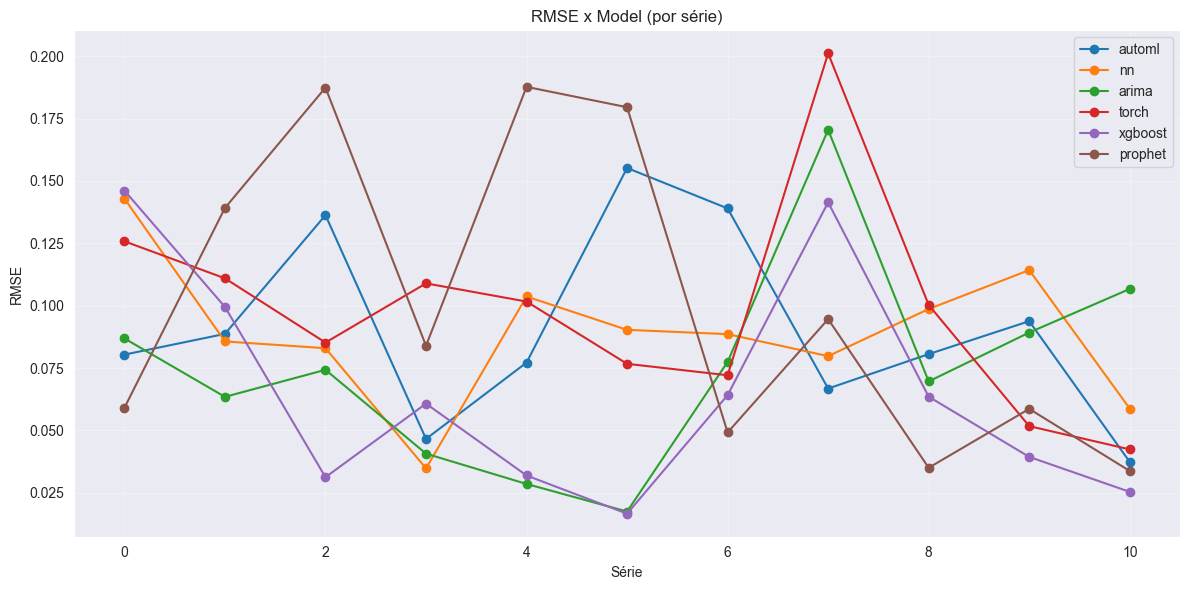

In [18]:
plt.figure(figsize=(12, 6))
for df, model_name in zip(stack, models):
    plt.plot(df['RMSE'].values, marker='o', label=model_name)
plt.title('RMSE x Model (por série)')
plt.xlabel('Série')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [19]:
rmse_table = pd.DataFrame()
for df, model_name in zip(stack, models):
    rmse_table[model_name] = df['RMSE'].round(4)

rmse_table.index =  [f"#{i}" for i in range(1, 12)]
display(rmse_table)
rmse_table.to_excel('rmse_compare_results.xlsx')
rmse_table.to_latex('rmse_compare_results.tex')

,automl,nn,arima,torch,xgboost,prophet
#1,0.0804,0.1429,0.0869,0.1258,0.1461,0.0591
#2,0.0887,0.0857,0.0635,0.1110,0.0995,0.1392
#3,0.1363,0.0830,0.0743,0.0852,0.0313,0.1874
#4,0.0466,0.0348,0.0407,0.1090,0.0607,0.0839
#5,0.0772,0.1037,0.0286,0.1017,0.0320,0.1877
#6,0.1552,0.0903,0.0175,0.0767,0.0166,0.1795
#7,0.1390,0.0886,0.0775,0.0721,0.0642,0.0492
#8,0.0668,0.0798,0.1705,0.2011,0.1414,0.0946
#9,0.0806,0.0987,0.0696,0.1003,0.0635,0.0350
#10,0.0938,0.1143,0.0892,0.0517,0.0394,0.0586


- #1 e #7 representaram séries com alto erro (difícil predict)
- Percebe-se que uma rede neural ajustada por busca bayesiana obteve um erro mais constante
- AUTOML demonstra maior perturbação (provavelmente por cada série ajustar-se por um modelo)
- Visando acurácia, Xgboost será o modelo campeão.